### Gradient Boosting

In [1]:
# Import our dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from pathlib import Path

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def preprocessFile(filename = Path('../Data/AdultCensusUpdated.csv')):
    
    print(f'Preprocessing file {filename}')
    dtype_mapper = {'age': 'int64',
                    'workclass': 'string',
                    'fnlwgt': 'int64',
                    'education': 'string',
                    'education.num': 'int64',
                    'marital.status': 'string',
                    'occupation': 'string',
                    'relationship': 'string',
                    'race': 'string',
                    'sex': 'string',
                    'capital.gain': 'int64',
                    'capital.loss': 'int64',
                    'hours.per.week': 'int64',
                    'native.country': 'string',
                    'income': 'string',
                    'State': 'string'}
    df = pd.read_csv(filename, dtype=dtype_mapper, na_values='?')    
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'state']
    df = df.drop(['fnlwgt',
                  'education', 
                #   'state',
                  'capital_gain', 
                  'capital_loss',
                  'native_country'], axis=1)
    df = df.dropna()
    return df

census_df = preprocessFile()
census_df.sample(10)

Preprocessing file ..\Data\AdultCensusUpdated.csv


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state
1379,27,Private,13,Never-married,Sales,Not-in-family,White,Male,45,<=50K,Mississippi
7533,31,Private,11,Married-civ-spouse,Other-service,Wife,Amer-Indian-Eskimo,Female,24,<=50K,Nevada
3027,36,Private,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,>50K,New York
4919,61,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,<=50K,Oklahoma
3661,46,Self-emp-not-inc,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,<=50K,South Dakota
6437,22,Local-gov,10,Never-married,Prof-specialty,Not-in-family,White,Female,21,<=50K,Connecticut
4477,25,Private,13,Never-married,Exec-managerial,Not-in-family,White,Female,40,<=50K,Pennsylvania
16907,59,Private,15,Married-spouse-absent,Prof-specialty,Unmarried,White,Male,50,<=50K,Vermont
15088,30,Private,9,Married-civ-spouse,Transport-moving,Husband,White,Male,65,>50K,Virginia
7673,50,Private,13,Divorced,Prof-specialty,Unmarried,White,Female,36,<=50K,California


### Separate the features X from the target y

In [4]:
y = census_df.income

X = census_df.copy()
X.drop('income', axis=1, inplace=True)

In [5]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each non-numeric column
for col in X.select_dtypes(include=["string"]).columns:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
1,82,2,9,6,3,1,4,0,18,19
3,54,2,4,0,6,4,4,0,40,11
4,41,2,10,5,9,3,4,0,40,8
5,34,2,9,0,7,4,4,0,45,8
6,38,2,6,5,0,4,4,1,40,4


In [6]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

# Create scaler instance
X_scaler = scaler.fit(X_train)

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
gb_model = GradientBoostingClassifier()
gb_model = gb_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = gb_model.predict(X_test_scaled)


In [8]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [9]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5285,467
Actual 1,805,1123


Accuracy Score : 0.834375
Classification Report
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      5752
        >50K       0.71      0.58      0.64      1928

    accuracy                           0.83      7680
   macro avg       0.79      0.75      0.77      7680
weighted avg       0.83      0.83      0.83      7680



### Export Classification Report

In [10]:
import csv

def classificationReportToPanda(report, model):
    file = f'../Data/classification_report_{model}.csv'
    df = pd.DataFrame(report).transpose()
    df['model'] = model
    df['model'] = df['model'].astype('string')
    df['support'] = df['support'].astype('int64')    
    df.to_csv(file, index_label='class', quoting=csv.QUOTE_ALL)
    display(df)

report = classification_report(y_test, predictions, output_dict=True)

classificationReportToPanda(report, 'GradientBoosting')

,precision,recall,f1-score,support,model
<=50K,0.867816,0.918811,0.892586,5752,GradientBoosting
>50K,0.706289,0.582469,0.638431,1928,GradientBoosting
accuracy,0.834375,0.834375,0.834375,0,GradientBoosting
macro avg,0.787053,0.750640,0.765508,7680,GradientBoosting
weighted avg,0.827266,0.834375,0.828782,7680,GradientBoosting


### Analyze The important features

In [11]:
# Gradient Boosting in sklearn will automatically calculate feature importance
importances = gb_model.feature_importances_
# We can sort the features by their importance
sorted(zip(gb_model.feature_importances_, X.columns), reverse=True)

[(0.4521324119703257, 'relationship'),
 (0.29237379860603496, 'education_num'),
 (0.09598413925850562, 'age'),
 (0.059174124854839145, 'hours_per_week'),
 (0.04597402152211606, 'occupation'),
 (0.02712647374776363, 'marital_status'),
 (0.012004610604067921, 'workclass'),
 (0.011781947092207926, 'sex'),
 (0.002783449740195931, 'state'),
 (0.000665022603943079, 'race')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

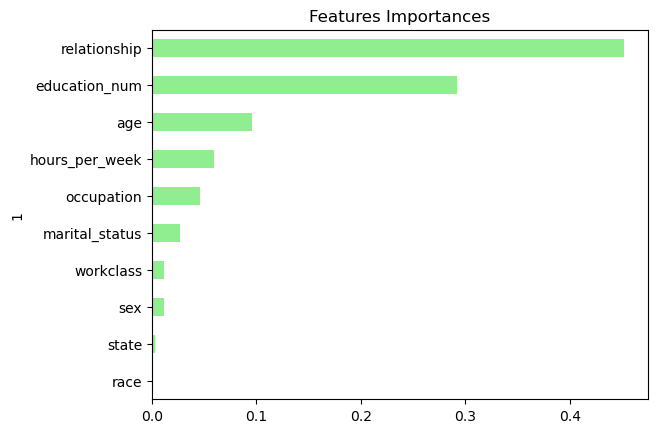

In [12]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(gb_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [13]:
# Adding Results to X_test dataframe
# Adding to X-Test becasue it has the same index as original dataframe
model_name=[]
for value in predictions:
    model_name.append('GradientBoosting')

X_test['Results'] = predictions
X_test['Model'] = model_name

# Drop unnecessary columns
X_test = X_test.drop(columns = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'hours_per_week', 'state'])

X_test.head()

,Results,Model
3314,<=50K,GradientBoosting
19677,>50K,GradientBoosting
29448,>50K,GradientBoosting
3581,<=50K,GradientBoosting
25490,<=50K,GradientBoosting


In [14]:
# Copy original reprocess dataset
census_copy_df = census_df.copy()

#Join result data to original
census_copy_df = census_copy_df.join(X_test)
census_copy_df = census_copy_df.dropna(axis=0, how='any')
census_copy_df.head(20)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state,Results,Model
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,Maryland,<=50K,GradientBoosting
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K,Florida,<=50K,GradientBoosting
13,32,Private,14,Separated,Exec-managerial,Not-in-family,White,Male,55,>50K,New Hampshire,<=50K,GradientBoosting
16,45,Private,7,Divorced,Transport-moving,Not-in-family,White,Male,76,>50K,Wyoming,<=50K,GradientBoosting
22,61,Private,9,Divorced,Sales,Unmarried,White,Female,25,<=50K,New York,<=50K,GradientBoosting
26,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,<=50K,Colorado,<=50K,GradientBoosting
27,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,40,<=50K,Montana,<=50K,GradientBoosting
28,37,Self-emp-inc,6,Never-married,Transport-moving,Not-in-family,White,Male,50,>50K,Colorado,<=50K,GradientBoosting
30,23,Private,10,Separated,Other-service,Not-in-family,White,Male,40,>50K,New York,<=50K,GradientBoosting
36,53,Private,9,Never-married,Sales,Not-in-family,White,Male,48,>50K,Utah,<=50K,GradientBoosting


In [15]:
# Export
census_copy_df.to_csv('../Data/GradientBoosting.csv', index_label='index')